<a href="https://colab.research.google.com/github/ullola17/datos_masivos_02/blob/main/EjercicioSeriesTiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejercicio Series Series de Tiempo
## Curso Ingeniería de Datos Masivos
## Tec Milenio

In [ ]:
# importando librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Importar desde drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# leyendo datos
data = pd.read_csv('/content/drive/MyDrive/Act10DatosMas/sales-of-shampoo.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Convirtiendo a fechas y poniendo índice de fechas
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)


In [ ]:
# describiendo datos

In [ ]:
serie_tiempo = data['Sales']
serie_tiempo.head()

Month
2011-01-01    266.0
2011-02-01    145.9
2011-03-01    183.1
2011-04-01    119.3
2011-05-01    180.3
Name: Sales, dtype: float64

### 1. Checar la estacionalidad de la Serie de Tiempo

Un Serie de Tiempo es estacionaria si sus propiedades estadísticas como la media, la varianza permanecen constantes en el tiempo y una autocovarianza que no depende del tiempo.

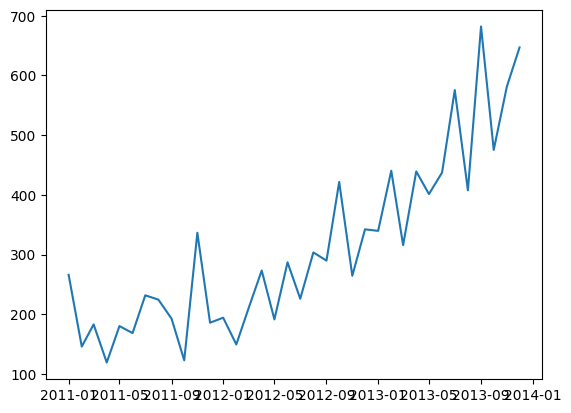

In [ ]:
plt.plot(serie_tiempo)
plt.show()

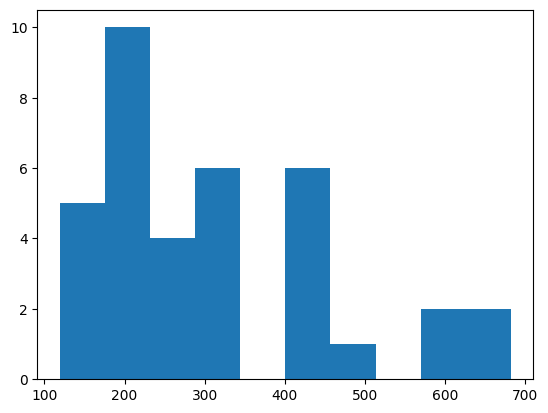

In [ ]:
# Histograma de los datos
plt.hist(serie_tiempo)
plt.show()

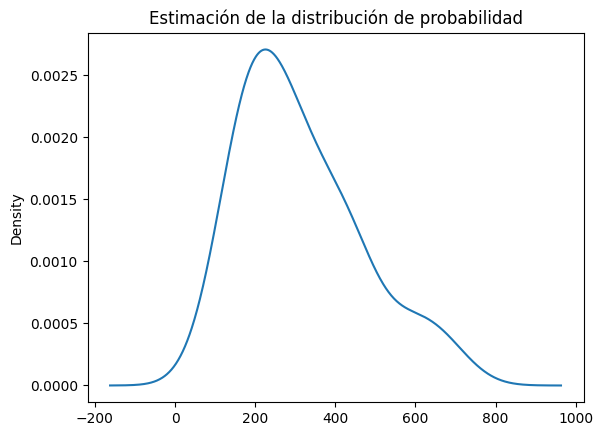

In [ ]:
# Estimación de la función de distribución de probabilidad

#La densidad de probabilidad es la relación entre las observaciones y su probabilidad.

#Algunos resultados de una variable aleatoria tendrán baja densidad de probabilidad y
#otros resultados tendrán una alta densidad de probabilidad.

# Es útil conocer la función de densidad de probabilidad  de datos
# para saber si una observación dada es improbable, tan improbable como para considerarse un valor atípico o una anomalía
# y si debe eliminarse.

serie_tiempo.plot(kind='kde')
plt.title('Estimación de la distribución de probabilidad')
plt.show()

In [ ]:


def test_stationarity(timeseries):

    #Determining rolling statistics
    rolmean = timeseries.rolling(window = 3).mean()
    rolstd = timeseries.rolling(window = 3).std()

    #plotting rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    st = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling  Mean & Standard Deviation')
    plt.show()



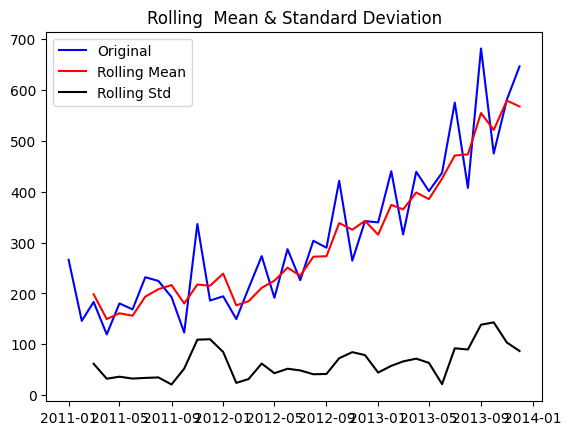

In [ ]:
test_stationarity(serie_tiempo)

La desviación estándar tiene una variación muy menor, pero la media aumenta continuamente. Por lo tanto, no es una serie estacionaria.

### 2. Hacer la Serie de Tiempo Estacionaria

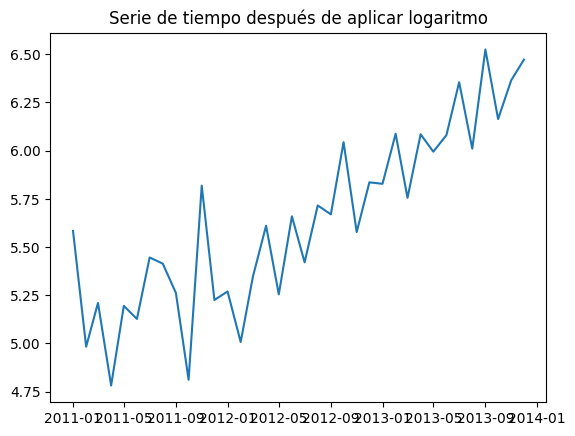

In [ ]:
# Aplicando logaritmo
serie_tiempo_log = np.log(serie_tiempo)

plt.plot(serie_tiempo_log)
plt.title('Serie de tiempo después de aplicar logaritmo')
plt.show()

#### Promedios móviles


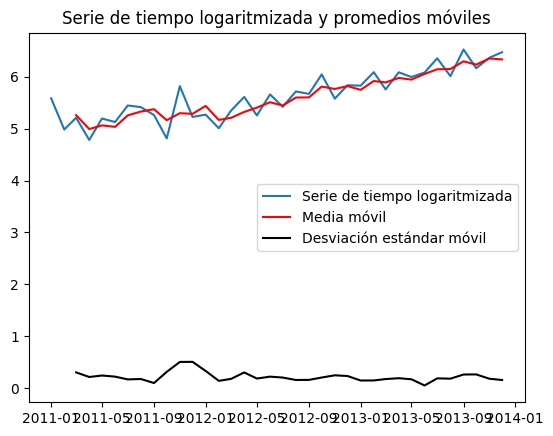

In [ ]:
# Agrega tu código de promedios
rolmean_log = serie_tiempo_log.rolling(window=3).mean()
rolstd_log = serie_tiempo_log.rolling(window=3).std()

plt.plot(serie_tiempo_log, label='Serie de tiempo logaritmizada')
plt.plot(rolmean_log, color='red', label='Media móvil')
plt.plot(rolstd_log, color='black', label='Desviación estándar móvil')
plt.legend()
plt.title('Serie de tiempo logaritmizada y promedios móviles')
plt.show()


### 3. Eliminando Tendencia y Estacionalidad

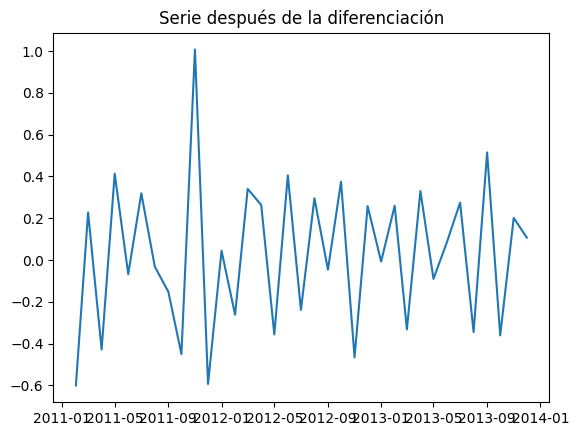

In [ ]:
# Agrega aqupi tu código para hacer descomposición
serie_tiempo_log_diff = serie_tiempo_log - serie_tiempo_log.shift()
serie_tiempo_log_diff.dropna(inplace=True)

plt.plot(serie_tiempo_log_diff)
plt.title('Serie después de la diferenciación')
plt.show()


### Haciendo Pronóstico con Series de Tiempo

In [ ]:
#ACF plot
#pd.plotting.autocorrelation_plot()
#plt.show()

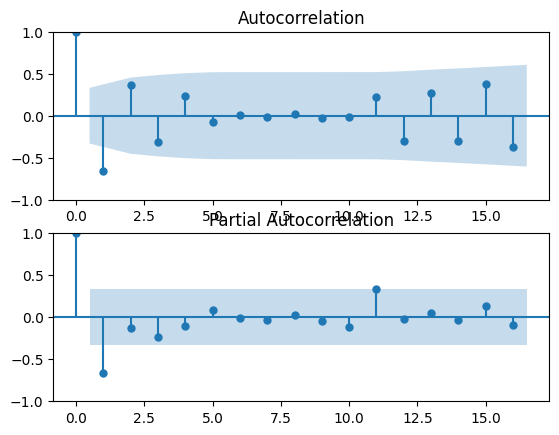

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

plt.subplot(211)
plot_acf(serie_tiempo_log_diff, ax=plt.gca())
plt.subplot(212)
plot_pacf(serie_tiempo_log_diff, ax=plt.gca())
plt.show()

In [ ]:
#Another method
#ACF and PACF plots
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(serie_tiempo_log_diff, nlags=3)
lag_pacf = pacf(serie_tiempo_log_diff, nlags=3, method='ols')

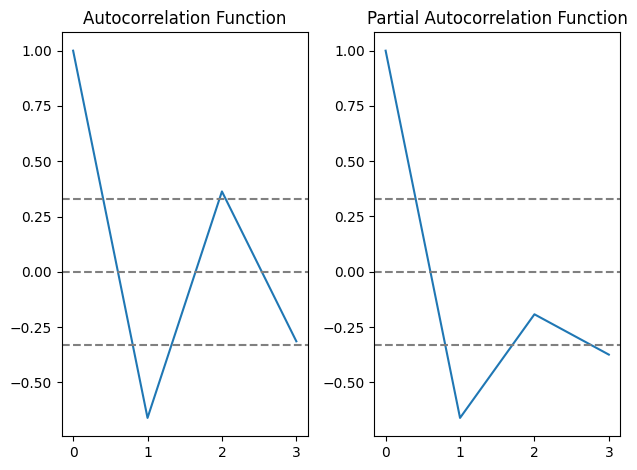

In [ ]:
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray') #Add a horizontal line across the axis at y = 0.
plt.axhline(y = -1.96/np.sqrt(len(serie_tiempo_log_diff)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(serie_tiempo_log_diff)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(serie_tiempo_log_diff)), linestyle='--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(serie_tiempo_log_diff)), linestyle='--', color = 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout() #Automatically adjust subplot parameters to give specified padding.

In [ ]:
pip install pmdarima


In [ ]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA as sm_ARIMA
import matplotlib.pyplot as plt

#### AR Model

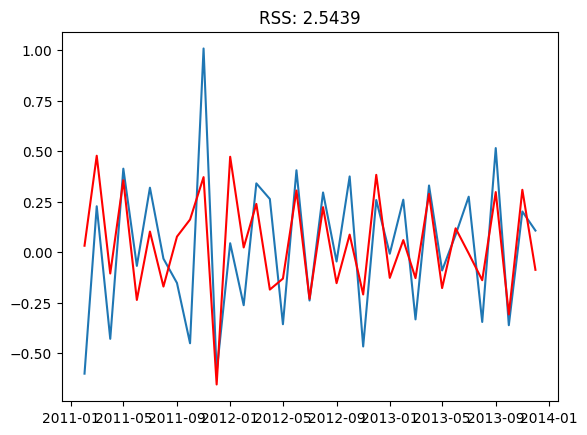

In [ ]:
# Ajuste automático del modelo ARIMA
model = auto_arima(serie_tiempo_log_diff, seasonal=False, suppress_warnings=True, stepwise=True)
order = model.get_params()['order']
# Utiliza los parámetros del modelo ARIMA ajustado automáticamente para crear un modelo AR
ar_model = sm_ARIMA(serie_tiempo_log_diff, order=(order[0], order[1], 0))
results_AR = ar_model.fit()
# Gráficos
plt.plot(serie_tiempo_log_diff)
plt.plot(results_AR.predict(), color='red')
plt.title('RSS: %.4f' % sum((results_AR.predict() - serie_tiempo_log_diff)**2))
plt.show()


#### MA Model

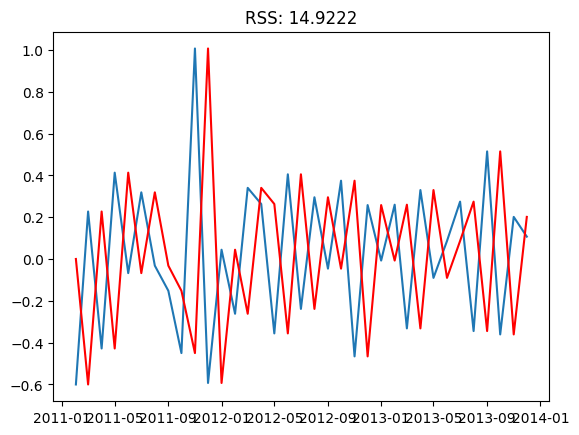

In [ ]:
# Ajuste automático del modelo ARIMA
model = auto_arima(serie_tiempo_log_diff, seasonal=False, suppress_warnings=True, stepwise=True)
order = model.get_params()['order']

# Utiliza los parámetros del modelo ARIMA ajustado automáticamente para crear un modelo MA
ma_model = sm_ARIMA(serie_tiempo_log_diff, order=(0, 1, order[2]))
results_MA = ma_model.fit()

# Gráficos
plt.plot(serie_tiempo_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_MA.fittedvalues - serie_tiempo_log_diff)**2))
plt.show()

#### Model Combinado

In [ ]:
#model = ARIMA(serie_tiempo_log, order = (,,))
#results_ARIMA = model.fit(disp = -1)
#plt.plot(serie_tiempo_log_diff)
#plt.plot(results_ARIMA.fittedvalues, color= 'red')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - serie_tiempo_log_diff)**2))
#plt.show()

Los modelos AR y MA tienen casi el mismo RSS pero combinados es significativamente mejor.

#### Regresando a la Serie de Tiempo Original

In [ ]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

p = 0
q = 0
d = 0
aic = []

#for p in range(maxp):
#    for d in range(maxd):
#        for q in range(maxq):
#            try:
#                model =ARIMA(serie_tiempo_log, order=(p,d,q))
#                model_fit=model.fit(disp=0)
#                obtener error del modelo o usar el valor de model_fit.aic
#
#            except:
#                continue
#                ignora el error e intenta otra vez





In [ ]:
### Selecciona el modelo ARIMA con los valores p, d q con menor error
### Usar modelo para hacer predicciones